In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

In [2]:
np.set_printoptions(suppress=True)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of RGB image...
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-14.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-19.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-25.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-30.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-46.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-51.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-10-55.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-11-29.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-19-25.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-19-37.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-44-00.jpg
find the chessboard corners of camera_calibration_data\2020-02-05_14-44-05.jpg
fin

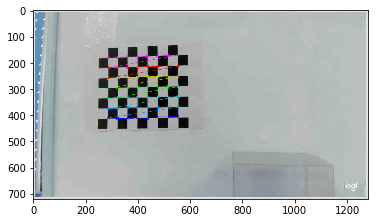

In [4]:
RGBobjpoints = []
RGBimgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_calibration_data/*g')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of RGB image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
#     print(len(corners))

    # If found, add object points, image points
    if ret == True:
        RGBobjpoints.append(objp)
        RGBimgpoints.append(corners)
#         print(fname)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
    else:
        print(fname)

In [5]:
print('Camera calibration by recorded RGB image...')
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(RGBobjpoints), len(RGBimgpoints))
print(RGBobjpoints[0].shape, RGBimgpoints[0].shape)
print(img_size)
ret, RGB_mtx, RGB_dist, RGB_rvecs, RGB_tvecs = cv2.calibrateCamera(RGBobjpoints, RGBimgpoints, img_size,None,None)
RGB_Vr = np.array(RGB_rvecs)
RGB_Tr = np.array(RGB_tvecs)
RGB_extrinsics = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
print(ret)
print(RGB_mtx)
print(RGB_dist)
print()
print(RGB_extrinsics)
print(RGB_Tr)

Camera calibration by recorded RGB image...
13 13
(56, 3) (56, 1, 2)
(1280, 720)
2.1426764126907707
[[913.24145912   0.         668.9538477 ]
 [  0.         905.10342204 389.24919723]
 [  0.           0.           1.        ]]
[[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]

[[ 1.15777197 -0.24406722 -2.87563373  6.34605197  2.59066397 56.26034627]
 [ 0.97085197 -0.27521324 -2.8770238   6.05744441  5.64200837 54.54868485]
 [-1.01520076 -0.29345114  2.89829311  7.31438022 -0.02905813 54.99834975]
 [ 0.50086109  0.17763204 -2.93947069  9.46311955  8.93549397 46.60453433]
 [-0.02312413  0.66109507 -2.97042526  2.29550287  5.39771176 48.25307342]
 [-0.30270168  0.0861351   3.07802653  5.70489785  1.41938825 48.35523223]
 [-0.41499889  0.14721635  2.78705199 12.84674722  0.0661825  50.89361271]
 [ 0.62612129 -0.24965246 -3.03763498  3.87684908  6.22615378 48.518828  ]
 [ 0.65402399 -0.15144615 -2.96114318  3.23746834  7.20069657 49.50940593]
 [ 0.77294896 -0.30004356 -2.9786